# Oblig 1
## Steinn Hauser Magnusson
### steinnhm, STK4900, 2020, University of Oslo

The following assignment is conducted and produced in a Jupyter Notebook and subsequently exported to a pdf file. The original notebook can be found on my github, to check reproducibility: https://github.com/steinnhauser/STK4900/Oblig1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1 Libraries
import seaborn as sbn
from sklearn import linear_model
from sklearn.metrics import r2_score

# Problem 2 Libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

# Problem 1

In [2]:
data = pd.read_csv("no2.txt", "\t")

# a)

The main features of the variables log.no2 and log.cars are the following:

In [3]:
data.describe()

,log.no2,log.cars,temp,wind.speed,hour.of.day
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,3.698368,6.973342,0.847400,3.056000,12.382000
std,0.750597,1.087166,6.524636,1.784172,6.802693
min,1.223780,4.127130,-18.600000,0.300000,1.000000
25%,3.213863,6.175842,-3.900000,1.675000,6.000000
50%,3.848020,7.425360,1.100000,2.800000,12.500000
75%,4.216930,7.793175,4.900000,4.200000,18.000000
max,6.395090,8.348540,21.100000,9.900000,24.000000


As you can see, the spread of the variables is not too large in the case of the no2 and cars variables (though these are transformed logarithmically), and the largest spread (largest standard deviation value) is for the temp and hour.of.day variables.

Make a scatterplot with log.cars on
the x-axis and log.no2 on the y-axis

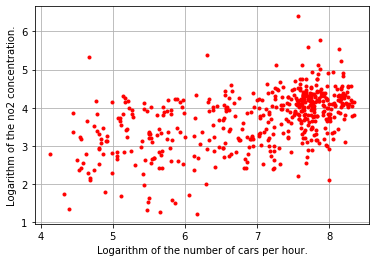

In [4]:
plt.plot(data["log.cars"], data["log.no2"], "r.")
plt.grid()
plt.xlabel("Logarithm of the number of cars per hour.")
plt.ylabel("Logarithm of the no2 concentration.")
plt.show()

Here we see the scatterplot, and there is a clear trend to be seen. There are not many outliers and major variances in the data, though there is a clear clutter of points around the (log.co2, log.cars) = (4, 7.8) point.

# b)
Fit a simple linear model where the log [no2] is
explained by the amount of traffic, measured by log.cars

The linear fit produced an intercept = 1.233 and a slope 0.354.
R2 Score of the linear fit:	0.6434.


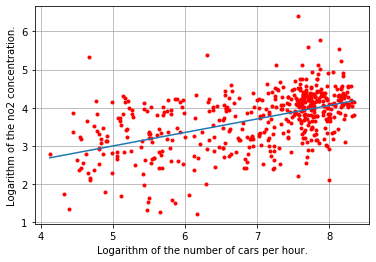

In [5]:
# Simple linear model of degree 1.
coefs = np.polyfit(data["log.cars"], data["log.no2"], 1)

# Generate the prediction line.
xrange = np.linspace(
    data["log.cars"].min(),
    data["log.cars"].max(),
    data["log.cars"].index.size
)
pred = coefs[1]+coefs[0]*xrange
print(f"The linear fit produced an intercept = {coefs[1]:.3f} and a slope {coefs[0]:.3f}.")
# Calculate the R2 score.
target = data["log.no2"].values.copy()
target = target[np.argsort(target)]
r2_linfit = r2_score(target, pred)
print(f"R2 Score of the linear fit:\t{r2_linfit:.4f}.")

# Generate a new plot which now includes the linear fit.
plt.plot(data["log.cars"], data["log.no2"], "r.")
plt.plot(xrange,pred)
plt.grid()
plt.xlabel("Logarithm of the number of cars per hour.")
plt.ylabel("Logarithm of the no2 concentration.")
plt.show()

The fact that the intercept of the log.no2 variable is at 1.233 indicates that there will always be some baseline level of no2 gas concentration when there are no cars in the vicinity. 

The slope of the log.cars variable indicates that the level of the log.no2 gas concentration increases by approximately 0.354 for each time the number of cars per hour increases by a factor 10. This is as expected, as the no2 concentration should increase for more cars due to the exhaust.

We also see that the blue line (linear approximation) nicely goes through the mean of the data points, and meets the cluster quite nicely.

The R2 measure is an indication of how close the data prediction (in our case the blue line) is to the data points. The closer the R2 measure is to 1, the more accurately the prediction moves through the data set. This however is not an indication of a good model, as an R2 score equal to 1 still has overfitting potential. 

# c)
Check various residual plots to judge if
the model assumptions for the model are reasonable.

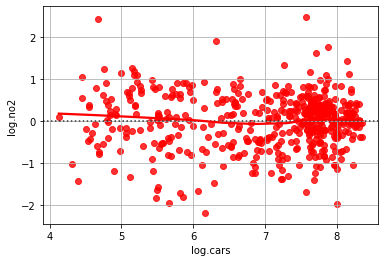

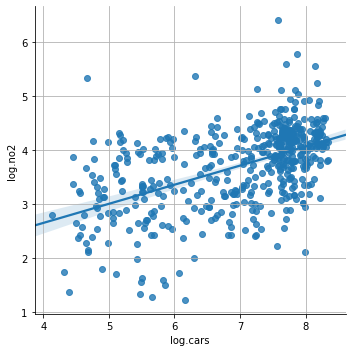

In [6]:
sbn.residplot(
    data["log.cars"],
    data["log.no2"],
    lowess=True,
    color="r",
    order=1
)
plt.grid()
plt.show()

sbn.lmplot(x="log.cars", y="log.no2", data=data)
plt.grid()
plt.show()

The residual plots indicate that the model assumptions are not quite reasonable, as the residuals vary quite a bit in the boundaries.

# d)
Use multiple regression now. Check if some variables should be transformed.

Intercept of the multiple regression model:	 1.1521307491745914
Coefficients of the multiple regression model: 
{'log.cars': 0.45697370259460796, 'temp': -0.026855457556919645, 'wind.speed': -0.1493343546881326, 'hour.of.day': -0.013024852780716786}
R2 Score of the 2nd degree fit:	0.5719.
R2 Score of the 3rd degree fit:	0.5757.
R2 Score of the 4th degree fit:	0.6051.
R2 Score of the 5th degree fit:	0.6235.


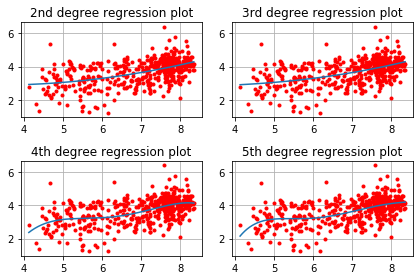

In [7]:
# Multiple Regression of several linear predictors
predictors = data.loc[:, data.columns!="log.no2"]
pd_headers = data.columns.values.tolist()[1:]
target = data["log.no2"]

model = linear_model.LinearRegression()
model.fit(predictors, target)

coefs = dict(zip(pd_headers, model.coef_))

print(f"Intercept of the multiple regression model:\t {model.intercept_}")
print(f"Coefficients of the multiple regression model: \n{coefs}")

# Multidimensional Regression checks of the number of cars variable
target = data["log.no2"].values.copy()
target = target[np.argsort(target)]

xrange = np.linspace(
    data["log.cars"].min(),
    data["log.cars"].max(),
    data["log.cars"].index.size
)

# Conduct polynomial fits of degrees higher than 1
coefs2 = np.polyfit(data["log.cars"], data["log.no2"], 2)
coefs3 = np.polyfit(data["log.cars"], data["log.no2"], 3)
coefs4 = np.polyfit(data["log.cars"], data["log.no2"], 4)
coefs5 = np.polyfit(data["log.cars"], data["log.no2"], 5)

pred2 = coefs2[2] + \
        coefs2[1]*xrange + \
        coefs2[0]*xrange*xrange

pred3 = coefs3[3] + \
        coefs3[2]*xrange + \
        coefs3[1]*xrange*xrange + \
        coefs3[0]*xrange*xrange*xrange

pred4 = coefs4[4] + \
        coefs4[3]*xrange + \
        coefs4[2]*xrange*xrange + \
        coefs4[1]*xrange*xrange*xrange + \
        coefs4[0]*xrange*xrange*xrange*xrange

pred5 = coefs5[5] + \
        coefs5[4]*xrange + \
        coefs5[3]*xrange*xrange + \
        coefs5[2]*xrange*xrange*xrange + \
        coefs5[1]*xrange*xrange*xrange*xrange + \
        coefs5[0]*xrange*xrange*xrange*xrange*xrange

# Calculate the R2 scores of the higher order polynomial fits.
r2_linfit2 = r2_score(target, pred2)
r2_linfit3 = r2_score(target, pred3)
r2_linfit4 = r2_score(target, pred4)
r2_linfit5 = r2_score(target, pred5)

print(f"R2 Score of the 2nd degree fit:\t{r2_linfit2:.4f}.")
print(f"R2 Score of the 3rd degree fit:\t{r2_linfit3:.4f}.")
print(f"R2 Score of the 4th degree fit:\t{r2_linfit4:.4f}.")
print(f"R2 Score of the 5th degree fit:\t{r2_linfit5:.4f}.")

# Generate a new plot which now includes the 2nd degree fit.
plt.subplot(221)
plt.title("2nd degree regression plot")
plt.plot(data["log.cars"], data["log.no2"], "r.")
plt.plot(xrange,pred2)
plt.grid()

plt.subplot(222)
plt.title("3rd degree regression plot")
plt.plot(data["log.cars"], data["log.no2"], "r.")
plt.plot(xrange,pred3)
plt.grid()

plt.subplot(223)
plt.title("4th degree regression plot")
plt.plot(data["log.cars"], data["log.no2"], "r.")
plt.plot(xrange,pred4)
plt.grid()

plt.subplot(224)
plt.title("5th degree regression plot")
plt.plot(data["log.cars"], data["log.no2"], "r.")
plt.plot(xrange,pred5)
plt.grid()

plt.tight_layout()
plt.show()

The logarithmic cars value was found to be the most relevant in the multiple regression model:

* log.cars had coefficient 0.457
* temp had coefficient -0.027
* wind.speed had coefficient -0.149
* hour.of.day had coefficient -0.013

To check whether or not the other factors need transformation, the following code is implemented:

In [8]:
# Transformation using the logarithmic function
# data["temp"] = data["temp"].apply(lambda x: np.log(x))  # Negative values makes this invalid
# data["wind.speed"] = data["wind.speed"].apply(lambda x: np.log(x)) # NaN values encountered here as well
# data["hour.of.day"] = data["hour.of.day"].apply(lambda x: np.log(x)) # NaN values once again

# Transformation using the exponential function;
data["temp"] = data["temp"].apply(lambda x: np.exp(x))
data["wind.speed"] = data["wind.speed"].apply(lambda x: np.exp(x))
data["hour.of.day"] = data["hour.of.day"].apply(lambda x: np.exp(x))

# # Multiple Regression of several linear predictors, having now transformed some predictors
predictors = data.loc[:, data.columns!="log.no2"]
pd_headers = data.columns.values.tolist()[1:]
target = data["log.no2"]

model = linear_model.LinearRegression()
model.fit(predictors, target)

coefs = dict(zip(pd_headers, model.coef_))

print(f"Intercept of the multiple regression model:\t {model.intercept_}")
print(f"Coefficients of the multiple regression model: \n{coefs}")

Intercept of the multiple regression model:	 1.204492857711013
Coefficients of the multiple regression model: 
{'log.cars': 0.36064013181308335, 'temp': -6.167791460624429e-10, 'wind.speed': -5.933752505710652e-05, 'hour.of.day': -2.451715788156005e-12}


The Logarithmic function yielded invalid values and the exponential function caused the temp, wind.speed and hour.of.day coefficients to become even less, implying they have a lesser say in the outcome.

There may still be some transformation which is effective to the prediction, which is why the multiple degree regression study was conducted on the log.cars predictor. Of the plots above, the 5th degree regression produced the largest R2 score, though there is a risk for overfitting.

The 'best' model for prediction of no2 concentration at Alnabru can be a combination of the linear degree log.cars predictor (to avoid overfitting) and the inverse exponential hour.of.day variable, including a linear factor of the wind.speed variable.

# e)

Producing this new 'best' model:

In [9]:
data = pd.read_csv("no2.txt", "\t")

data["hour.of.day"] = data["hour.of.day"].apply(lambda x: 1./np.exp(x))

# # Multiple Regression of several linear predictors, having now transformed some predictors
predictors = data.loc[:, ["log.cars", "hour.of.day", "wind.speed"]]
pd_headers = predictors.columns.values.tolist()
target = data["log.no2"]

model = linear_model.LinearRegression()
model.fit(predictors, target)

coefs = dict(zip(pd_headers, model.coef_))

print(f"Intercept of the multiple regression model:\t {model.intercept_}")
print(f"Coefficients of the multiple regression model:{coefs}")

Intercept of the multiple regression model:	 1.5944583343766316
Coefficients of the multiple regression model:{'log.cars': 0.37313290588442305, 'hour.of.day': -0.2506886648977746, 'wind.speed': -0.1611807404248431}


These coefficients indicate that the no2 gas concentration increases for increasing number of cars, as seen before, though it also reveals that the gas concentration increases for an increasing hour of day (a negative coefficient on an inverse exponential function), and that the wind speed also has a negative impact on the no2 concentration.

These results are all feesible, as increasing the hour of day means that more cars are driving in (e.g. rush hours etc.), and the wind is likely to blow the concentration of no2 away from the measured area at Alnabru

# Problem 2

# a)
Loading and describing the data using boxplots and numerical summaries:

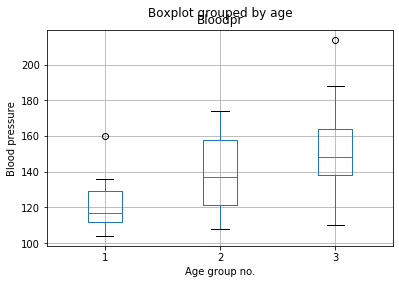

,Bloodpr,age
count,36.000000,36.000000
mean,138.805556,2.000000
std,25.749141,0.828079
min,104.000000,1.000000
25%,117.500000,1.000000
50%,136.000000,2.000000
75%,156.250000,3.000000
max,214.000000,3.000000


In [10]:
df = pd.read_csv("blood.txt", " ")

""" a)
Describe the data using boxplots
and numerical summeries
"""

df.boxplot(by="age")
plt.ylabel("Blood pressure")
plt.xlabel("Age group no.")
plt.show()

df.describe()

From the boxplot illustrated above, it seems clear that the general trend of blood pressure increases with the age groups. 

# b)

Assumptions made for the One-Way ANOVA are as follows:
* The variables must be independent and identically distributed (i.i.d.)
* The dependent variable is normally distributed in the population.

The null-hypothesis we are testing here is that the age parameter has no effect on the blood pressure data.

In [11]:

""" b)
Use one-way ANOVA to answer the question above.
Specify assumptions and the hypotheses you are testing.
Write a summary of your findings.
"""

mod = ols('Bloodpr ~ age', data=df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

            df        sum_sq     mean_sq          F    PR(>F)
age        1.0   6534.000000  6534.00000  13.325385  0.000871
Residual  34.0  16671.638889   490.34232        NaN       NaN


p < 0.05, so we reject our null hypothesis. This implies that the age does in fact have an impact on the blood pressure.

In [12]:
""" c)
Formulate this problem using a regression model with
age group as categorical predictor variable.
Use treatment contrast and the youngest group
as reference. Run the analysis, interpret the results and
write a conclusion. Compare with b).
"""

mod = ols("Bloodpr ~ age", data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Bloodpr   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     13.33
Date:                Mon, 24 Feb 2020   Prob (F-statistic):           0.000871
Time:                        19:29:55   Log-Likelihood:                -161.56
No. Observations:                  36   AIC:                             327.1
Df Residuals:                      34   BIC:                             330.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    105.8056      9.764     10.836      0.0

As We can see in the model, the general trend of the dataset is an intercept at Bloodpr = 105.8, indicating that there will always be some baseline bloodpressure which is independant of the age. Afterwards, the coefficient of the age was found to be 16.5, indicating that a jump in age group from 1 to 2 yields an increase in blood pressure of about 16.5. It was once again found that the P>|t| value (where the tolerance t=0.5 is typical) indicates that the age predictor causes us to reject our null hypothesis. This means that there is a clear relation between the age groups and the blood pressure increases.

Comparing with the exercise in **2b)**, then the P value was found to be even lower when conducting the one-way ANOVA (found to be PR(>F)=0.000871), whereas the fit above produced a stat of P>|t| = 0.001. This may simply be due to rounding of the values, however. 